In [12]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import regex as re

#data import
game_data = pd.read_csv('data/clean_data.csv')

---
Supported Languages: Processing

In [13]:
#extract languages
copy_game_data = game_data.copy()
lang_data = pd.DataFrame()
lang_data.insert(0, 'AppID', game_data['AppID'])
lang_data.insert(1, 'Name', game_data['Name'])
index = 0

for row in copy_game_data.itertuples(index = True, name = 'Data'):
    temp = re.sub('[\[\]\'\s]', '', row[11])
    temp = temp.split(',')

    if temp[0] == '':
        temp.clear()
        temp.append('None')                              

    length = len(temp)

    if temp[0] == 'None':
        length -= 1

    lang_data.at[index, 'Number of languages'] = length

    lang_data.at[index, 'Languages'] = temp

    index += 1

if (lang_data.at[0, 'AppID'] == 1469160):
    lang_data.at[0, 'Languages'] = list(['English'])

lang_data.to_csv("data/Lang.csv", index=False) 

In [14]:
#find all languages 
all_lang = list()
all_lang.clear()

for row in lang_data.itertuples(index = True, name = 'Data'):
    
    for item in row[4]:
       
        if item in all_lang:
            continue
        if item == 'None':
            continue
        if len(item) == 1:
            continue
        else:
            all_lang.append(item)

print(all_lang)
print('Number of languages', len(all_lang))

['English', 'French', 'Italian', 'German', 'Spanish-Spain', 'Russian', 'Japanese', 'SimplifiedChinese', 'TraditionalChinese', 'Korean', 'Polish', 'Portuguese', 'Turkish', 'Czech', 'Portuguese-Brazil', 'Hungarian', 'Dutch', 'Ukrainian', 'Danish', 'Arabic', 'Spanish-LatinAmerica', 'Thai', 'Finnish', 'Norwegian', 'Romanian', 'Swedish', 'Greek', 'Vietnamese', 'Bulgarian', 'Slovakian', 'Portuguese-Portugal', 'Indonesian', 'Hindi', 'Catalan']
Number of languages 34


In [15]:
lang_sep_data = pd.DataFrame()
lang_sep_data.insert(0, 'AppID', game_data['AppID'])
lang_sep_data.insert(1, 'Name', game_data['Name'])
lang_sep_data.insert(2, 'Price', game_data['Price'])

for language in all_lang:
    lang_sep_data[language] = 'F'

lang_sep_data['None'] = 'F'

lang_sep_data.to_csv("data/LangProcessing.csv", index=False)

In [16]:
index = 0

for row in lang_data.itertuples(index = True, name = 'Data'):
    
    for item in row[4]:
        lang_sep_data.at[index, item] = 'T'

    index += 1

lang_sep_data.to_csv("data/LangProcessing.csv", index=False)

In [17]:
#For the boxplots
#replace the TRUE values with the price
lang_sep_price = pd.read_csv('data/LangProcessing.csv').copy()
x=0
print(game_data.shape[0])
while x != game_data.shape[0]:

    for row in lang_sep_price.itertuples(index = True, name = 'Data'):
        lang_sep_price.loc[x] = lang_sep_price.loc[x].replace(to_replace='T', value=row[3])
        lang_sep_price.loc[x] = lang_sep_price.loc[x].replace(to_replace='F', value=None)
    
        x+=1

        if (x == game_data.shape[0]):
            break

lang_sep_price.to_csv('data/LangProcessing2.csv', index=False)

18272


---
Supported Languages: Analysis

In [18]:

lang_data = pd.read_csv('data/Lang.csv')
index = 0


for row in game_data.itertuples(index = True, name = 'Data'):

    temp = re.sub('[\[\]\'\s]', '', row[11])   #remove square brackets and apostrophes from string
    temp = temp.split(',')    #split string by ',' into a list 

    if temp[0] == '':
        temp.clear()
        temp.append('None')                              

    length = len(temp)

    if temp[0] == 'None':
        length -= 1

    lang_data.at[index, 'Number of languages'] = length   #store num of audio lang for each game

    lang_data.at[index, 'Languages'] = temp   #store list of languages

    index += 1

lang_data.to_csv("Lang.csv", index=False)   #overwrite audio.csv
print(lang_data.head())


     AppID                       Name  Number of languages  \
0  1469160             Wartune Reborn                  1.0   
1  1178150      MazM: Jekyll and Hyde                 10.0   
2   320150  Deadlings: Rotten Edition                  9.0   
3  1026420                     WARSAW                  5.0   
4   485000             Cthulhu Realms                  1.0   

                                           Languages  
0                                          [English]  
1  [English, French, Italian, German, Spanish-Spa...  
2  [English, Polish, French, Italian, German, Spa...  
3         [English, French, German, Polish, Russian]  
4                                          [English]  


0     1.0
1    10.0
2     9.0
3     5.0
4     1.0
Name: Number of languages, dtype: float64
count    18272.000000
mean         5.069396
std          5.269830
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         29.000000
Name: Number of languages, dtype: float64


<AxesSubplot:xlabel='Number of languages', ylabel='Density'>

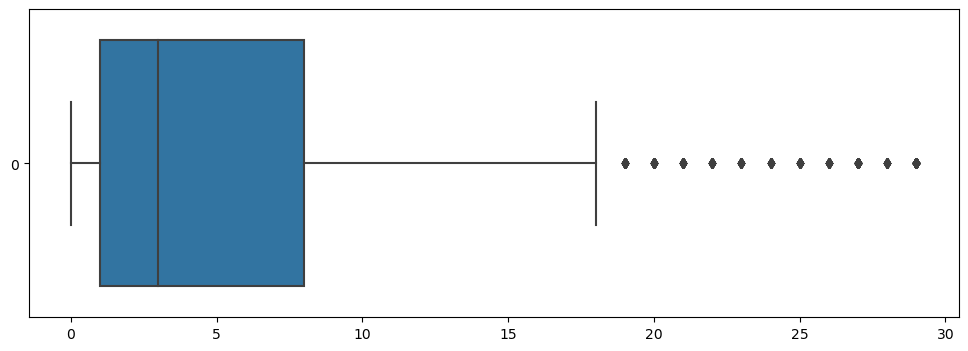

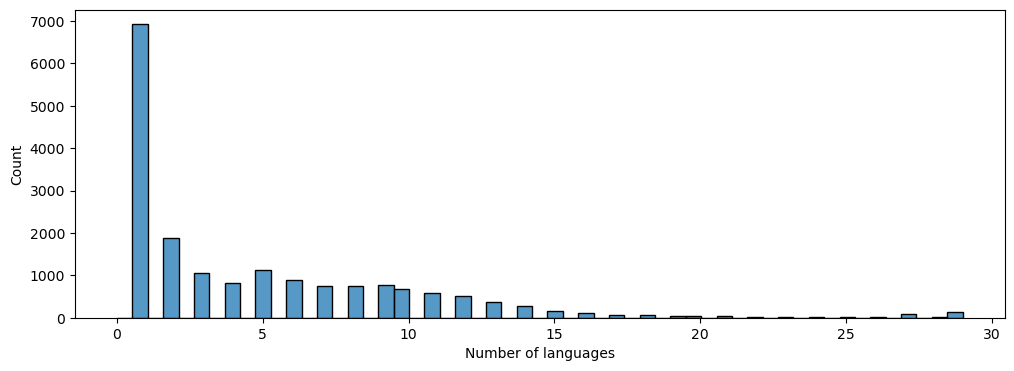

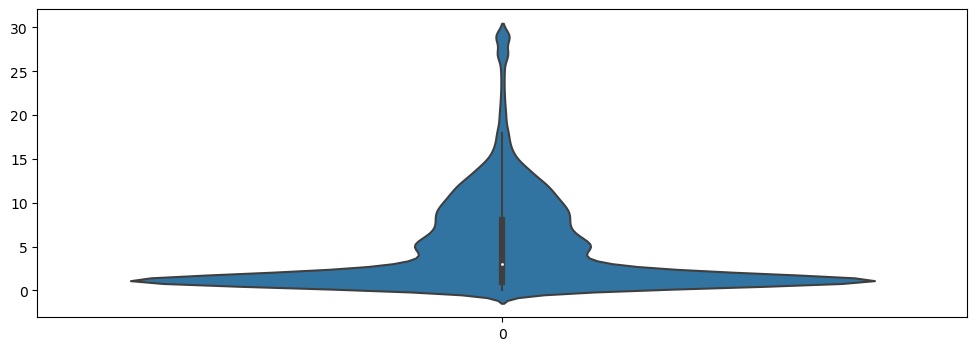

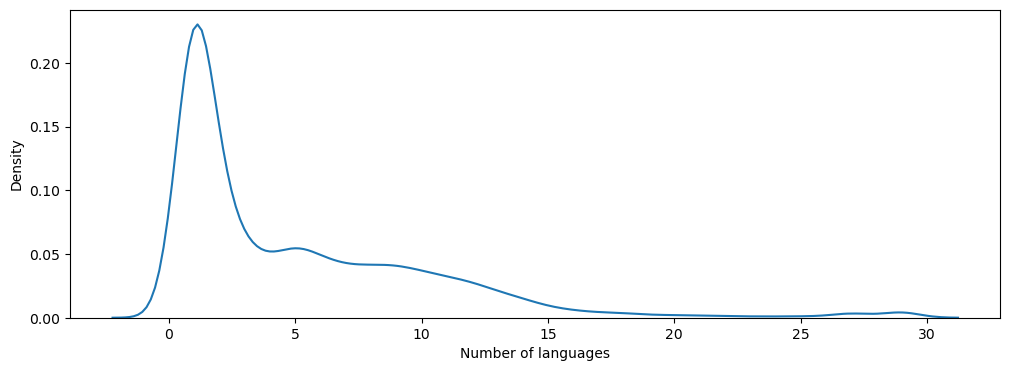

In [19]:
#univariate analysis of lang_count 
lang_count = lang_data['Number of languages']
print(lang_count.head())

#summary
print(lang_count.describe())

#boxplot
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = lang_count, orient = "h")

#hist plot
f = plt.figure(figsize=(12, 4))
sb.histplot(data = lang_count)

#violin plot
f = plt.figure(figsize=(12, 4))
sb.violinplot(data = lang_count)

#kde plot
f = plt.figure(figsize=(12, 4))
sb.kdeplot(data = lang_count)

   Number of languages  Price
0                  1.0   0.00
1                 10.0  14.99
2                  9.0   3.99
3                  5.0  23.99
4                  1.0   0.00
                     Number of languages     Price
Number of languages             1.000000  0.179074
Price                           0.179074  1.000000


<AxesSubplot:>

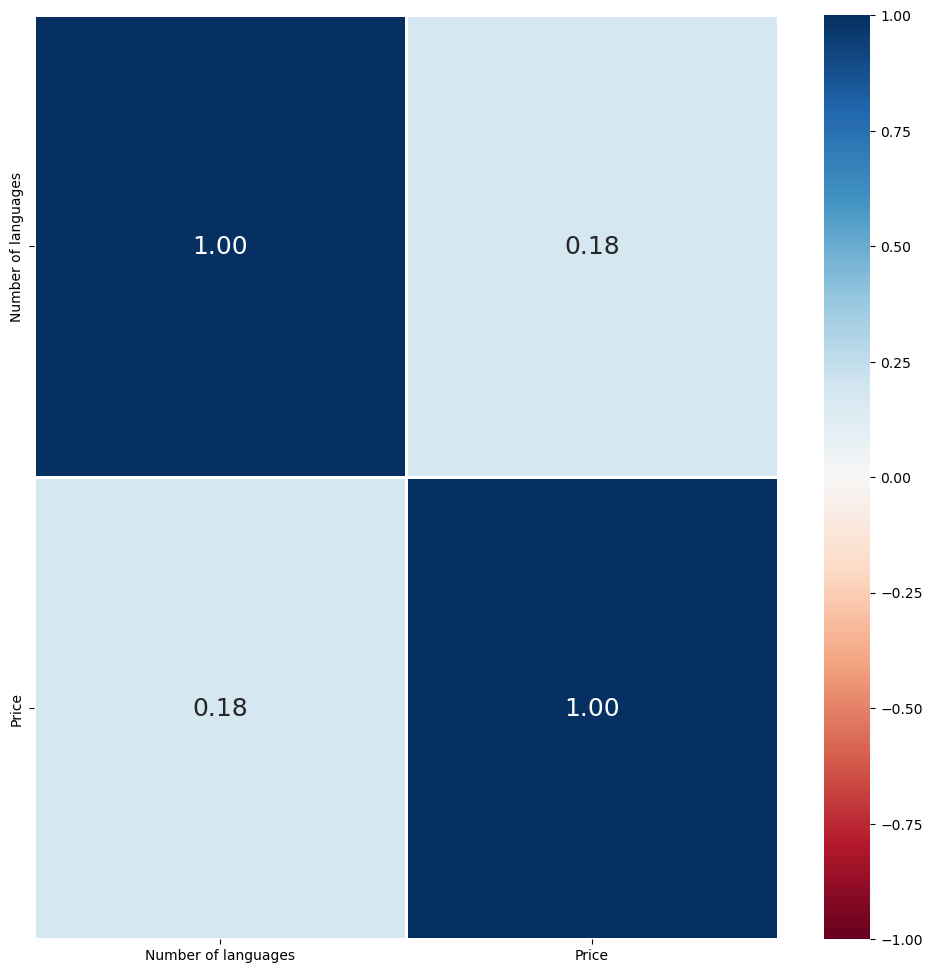

In [20]:
# Analyse relationship between lang count and price
# Add Price to the dataframe
lang_price = lang_count.copy()
lang_price = pd.concat([lang_price, game_data["Price"]], axis = 1).reindex(lang_price.index)
print(lang_price.head())

# Correlation Matrix
print(lang_price.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(lang_price.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

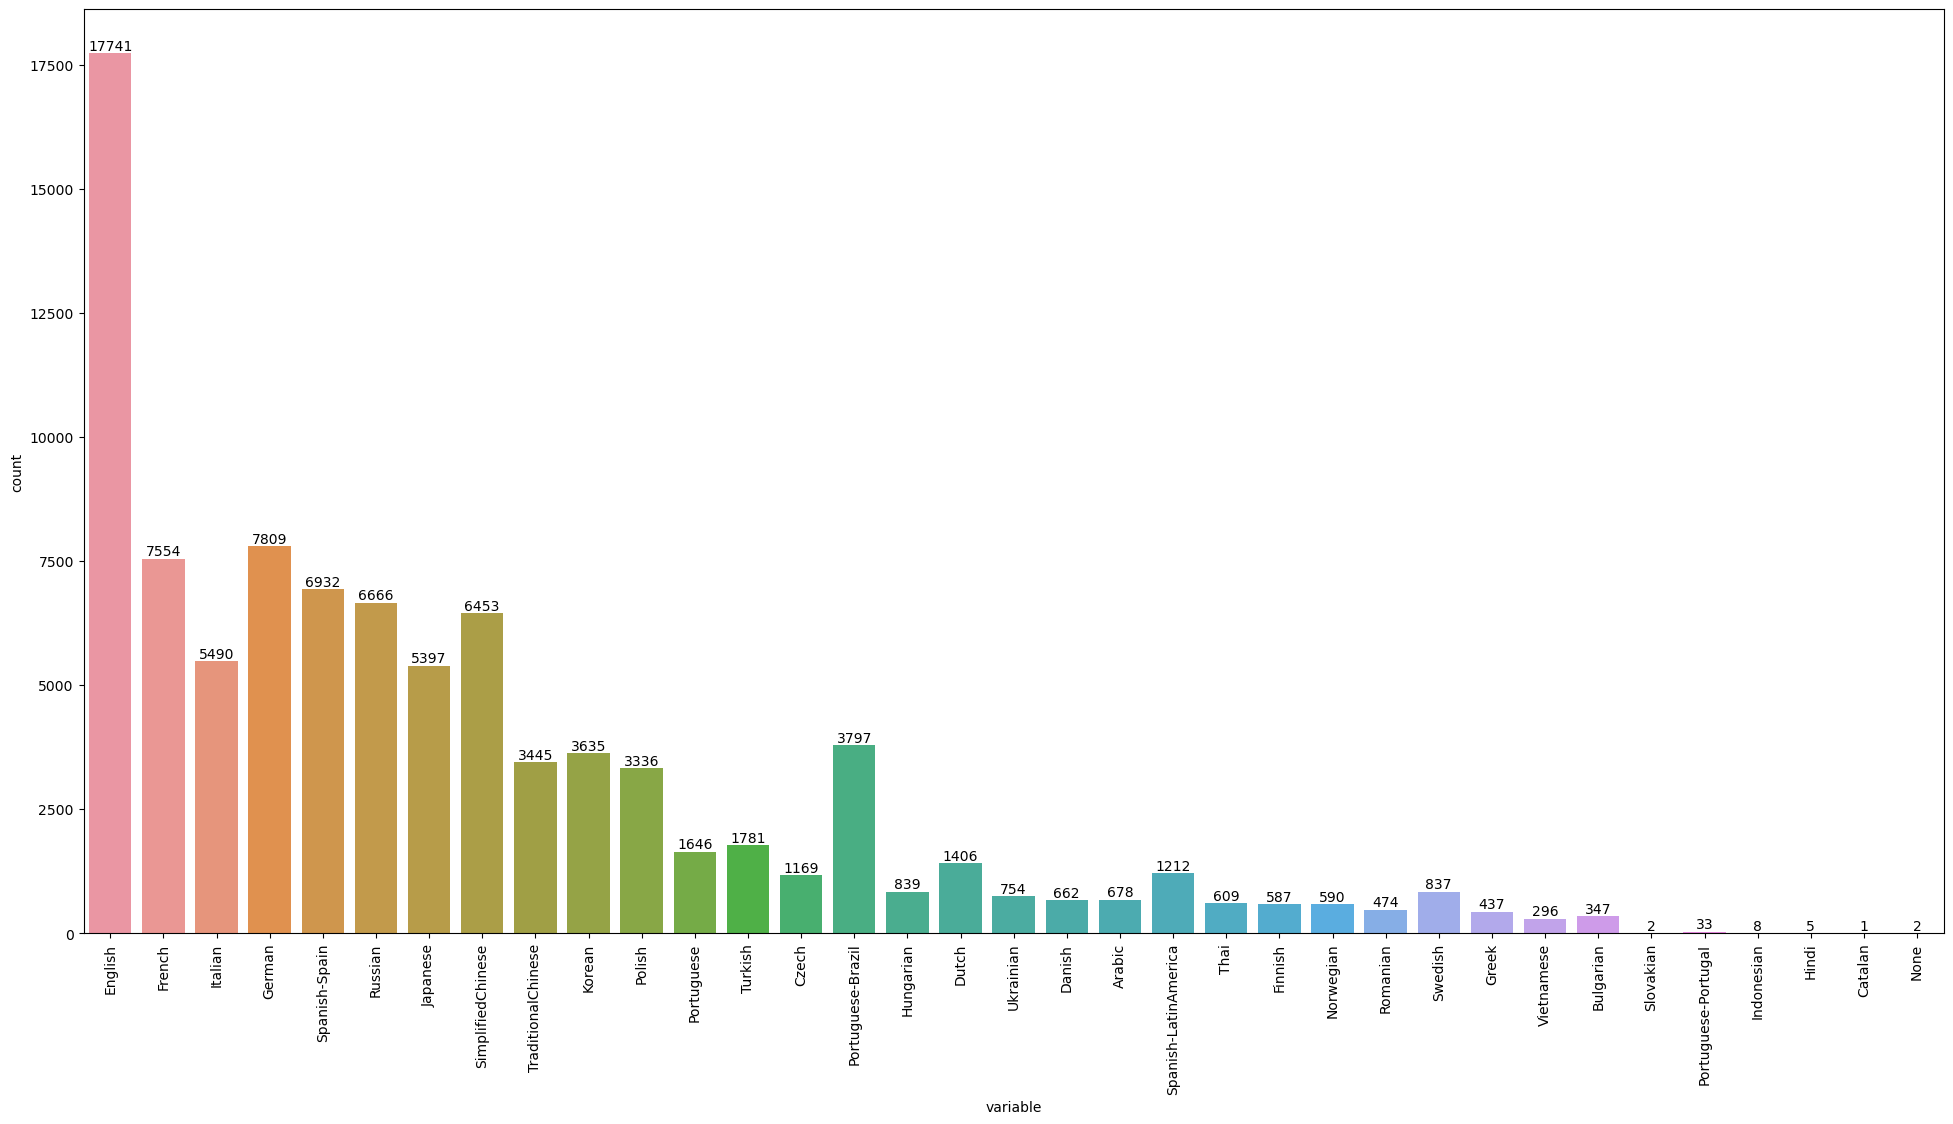

In [21]:
#countplot of each individual language
lang_sep = pd.read_csv('data/LangProcessing.csv')

lang_sep.drop(columns =['Price', 'AppID', 'Name'], inplace=True)

lang_sep2 = lang_sep.melt(value_vars=lang_sep.columns)
lang_sep2 = lang_sep2[lang_sep2["value"] != 'F']
f = plt.figure(figsize=(24, 12))

graph = sb.countplot(data=lang_sep2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()

count     2.00000
mean     32.49000
std      17.67767
min      19.99000
25%      26.24000
50%      32.49000
75%      38.74000
max      44.99000
Name: None, dtype: float64


[Text(0, 0, 'English'),
 Text(1, 0, 'French'),
 Text(2, 0, 'Italian'),
 Text(3, 0, 'German'),
 Text(4, 0, 'Spanish-Spain'),
 Text(5, 0, 'Russian'),
 Text(6, 0, 'Japanese'),
 Text(7, 0, 'SimplifiedChinese'),
 Text(8, 0, 'TraditionalChinese'),
 Text(9, 0, 'Korean'),
 Text(10, 0, 'Polish'),
 Text(11, 0, 'Portuguese'),
 Text(12, 0, 'Turkish'),
 Text(13, 0, 'Czech'),
 Text(14, 0, 'Portuguese-Brazil'),
 Text(15, 0, 'Hungarian'),
 Text(16, 0, 'Dutch'),
 Text(17, 0, 'Ukrainian'),
 Text(18, 0, 'Danish'),
 Text(19, 0, 'Arabic'),
 Text(20, 0, 'Spanish-LatinAmerica'),
 Text(21, 0, 'Thai'),
 Text(22, 0, 'Finnish'),
 Text(23, 0, 'Norwegian'),
 Text(24, 0, 'Romanian'),
 Text(25, 0, 'Swedish'),
 Text(26, 0, 'Greek'),
 Text(27, 0, 'Vietnamese'),
 Text(28, 0, 'Bulgarian'),
 Text(29, 0, 'Slovakian'),
 Text(30, 0, 'Portuguese-Portugal'),
 Text(31, 0, 'Indonesian'),
 Text(32, 0, 'Hindi'),
 Text(33, 0, 'Catalan'),
 Text(34, 0, 'None')]

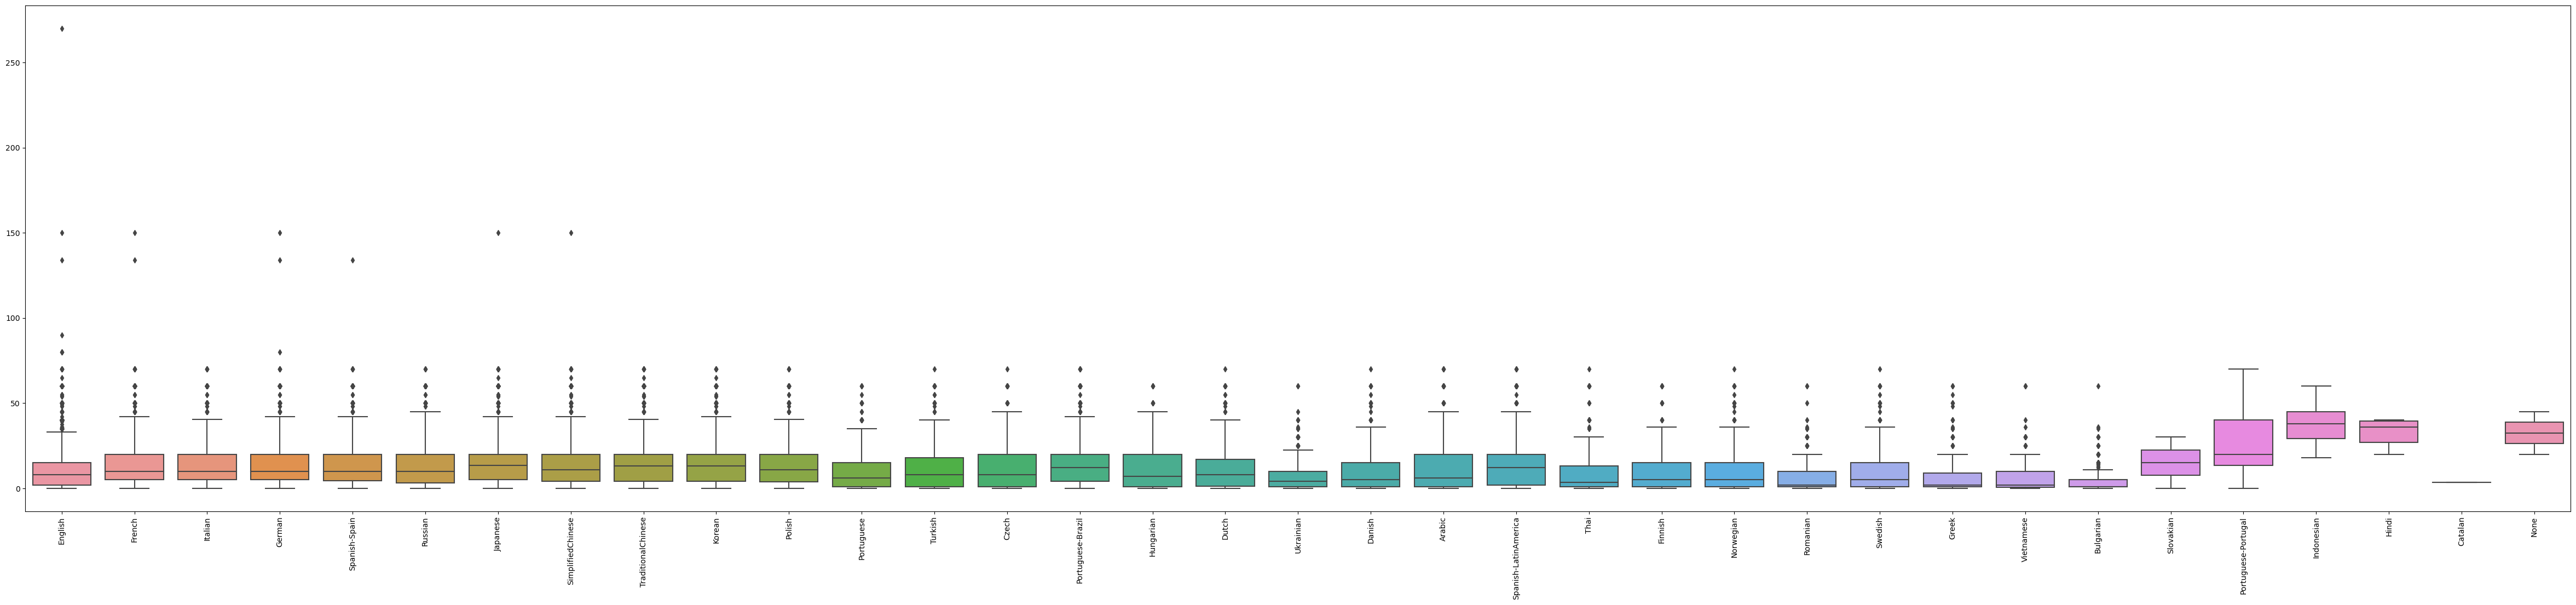

In [22]:
# boxplots for every language against price

lang_sep_price = pd.read_csv('data/LangProcessing2.csv').copy()
print(lang_sep_price['None'].describe())

lang_sep_price = lang_sep_price.drop(columns =['AppID', 'Price'])
f = plt.figure(figsize=(60, 12))

graph = sb.boxplot(data = lang_sep_price)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
